# What are the neighborhoods most requested by AirBnb customers?
To answer this question we will analyse the distribution of neighborhoods in the listings dataset.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Pretty display for notebooks
%matplotlib inline
% config InlineBachend.figure_format = 'retina'

In [2]:
# Load the data
data = pd.read_csv('listings.csv')[['neighbourhood', 'city', 'state']]
# Print the first five rows
data.head()

,neighbourhood,city,state
0,Queen Anne,Seattle,WA
1,Queen Anne,Seattle,WA
2,Queen Anne,Seattle,WA
3,Queen Anne,Seattle,WA
4,Queen Anne,Seattle,WA


In [3]:
# Cities in the data
data['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
西雅图                         1
seattle                     1
Phinney Ridge Seattle       1
Ballard, Seattle            1
Name: city, dtype: int64

In [4]:
data['state'].value_counts()

WA    3817
wa       1
Name: state, dtype: int64

In [5]:
data = data[data.city != '西雅图']
data.head()

,neighbourhood,city,state
0,Queen Anne,Seattle,WA
1,Queen Anne,Seattle,WA
2,Queen Anne,Seattle,WA
3,Queen Anne,Seattle,WA
4,Queen Anne,Seattle,WA


In [6]:
# Get the 10 requested neighbourhood
neig_count = data['neighbourhood'].value_counts()
df = pd.DataFrame({'neighbourhood': neig_count.index[:10],
                   '%req': 100*neig_count.iloc[:10].values/neig_count.sum()})
# Print five first rows of the data
df.head()

,%req,neighbourhood
0,10.317460,Capitol Hill
1,6.261023,Ballard
2,5.996473,Belltown
3,5.643739,Minor
4,5.496767,Queen Anne


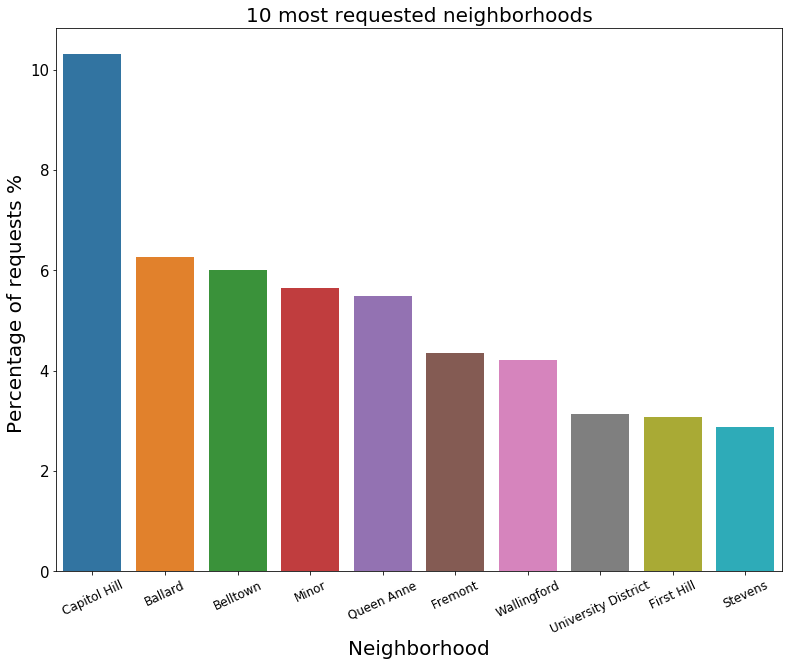

In [7]:
# Bar plot
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(1, 1, 1, aspect='auto')
sns.barplot(x=df.neighbourhood, y=df['%req'])
# Set axis label properties
ax.set_xlabel('Neighborhood', weight='normal', size=20)
ax.set_ylabel('Percentage of requests % ', weight='normal', size=20)
plt.title('10 most requested neighborhoods', fontsize=20)
# Set tick label properties
ax.tick_params('x', labelsize=12, rotation=25)
ax.tick_params('y', labelsize=15)
plt.show()